In [1]:
import cv2
import tracker as tr
import ect
import numpy as np
import matplotlib.pyplot as plt

radius = 200
img_offset = 10
ect_offset = 20

loader = tr.FilepathLoader(
    radius = radius,
    offset = img_offset
)

transformer = tr.UnfilteredTransformation(
    img_offset = img_offset,
    ect_offset = ect_offset
)

matcher = tr.RotShiftMatcher(
    transformer = transformer,
    bp_thresh = 0.05
)

In [2]:
image = loader.load("../tracker_tests/1_randscale_01.png")
template = loader.load("../tracker_tests/1_template.png")

template_fft = matcher.prepare(template)
image_fft = matcher.prepare(image)

plt.figure(figsize = (10, 10))

# plt.subplot(1, 2, 1)
# plt.imshow(ect.complex_to_hsv(template_ect))
# plt.title("Template ECT")

# plt.subplot(1, 2, 2)
# plt.imshow(ect.complex_to_hsv(image_ect))
# plt.title("Image ECT")

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [3]:
# P, R = template_ect.shape[:2]
# template_padded = np.zeros((2*P, 2*R, 1), dtype=np.complex128)
# template_padded[:P, :R, :] = template_ect

# image_padded = np.zeros((2*P, 2*R, 1), dtype=np.complex128)
# image_padded[:P, :R, :] = image_ect

# template_fft = np.fft.fft2(template_padded, axes = (0, 1))
# image_fft = np.fft.fft2(image_padded, axes = (0, 1))

# template_fft = np.fft.fft2(template_ect, axes=(0, 1))
# image_fft = np.fft.fft2(image_ect, axes=(0, 1))

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(ect.complex_to_hsv(template_fft))
# plt.title("Template FFT")

# plt.subplot(1, 2, 2)
# plt.imshow(ect.complex_to_hsv(image_fft))
# plt.title("Image FFT")

In [4]:
bp_thresh = 0.1

xcorr = template_fft * np.conj(image_fft)
# xcorr = xcorr[:P, :R, :]

xcorr_norm = xcorr/(np.abs(xcorr) + 1e-12)

# template_norm = ect.norm_minmax(np.abs(template_fft[:P, :R, :]), 0, 1, dtype=np.float64)
template_norm = ect.norm_minmax(np.abs(template_fft), 0, 1, dtype=np.float64)
bp_filt = np.zeros_like(template_norm)
bp_filt[template_norm > bp_thresh] = 1

xcorr_filt = xcorr_norm * bp_filt

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(ect.complex_to_hsv(xcorr))
# plt.title("XCORR")

# plt.subplot(1, 3, 2)
# plt.imshow(ect.complex_to_hsv(xcorr_norm))
# plt.title("XCORR Normalized")

# plt.subplot(1, 3, 3)
# plt.imshow(ect.complex_to_hsv(xcorr_filt))
# plt.title("XCORR Filtered")

Text(0.5, 1.0, 'XCORR Filtered result')

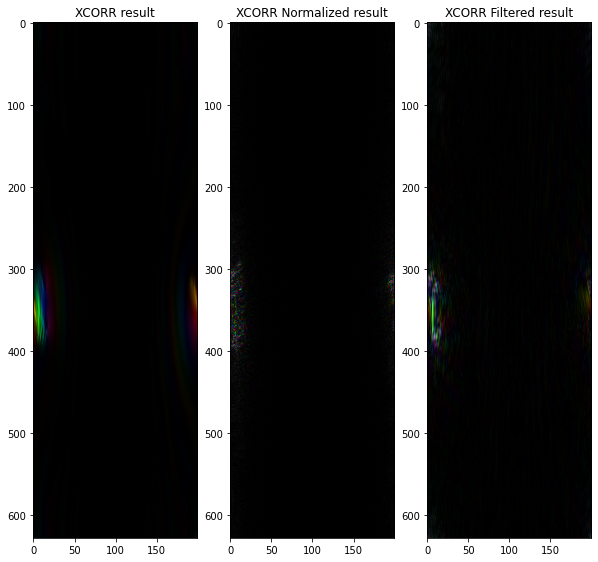

In [5]:
xcorr_result = np.fft.ifft2(xcorr, axes = (0, 1))
xcorr_norm_result = np.fft.ifft2(xcorr_norm, axes=(0, 1))
xcorr_filt_result = np.fft.ifft2(xcorr_filt, axes=(0, 1))

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(ect.complex_to_hsv(xcorr_result))
plt.title("XCORR result")

plt.subplot(1, 3, 2)
plt.imshow(ect.complex_to_hsv(xcorr_norm_result))
plt.title("XCORR Normalized result")

plt.subplot(1, 3, 3)
plt.imshow(ect.complex_to_hsv(xcorr_filt_result))
plt.title("XCORR Filtered result")

In [6]:
def extract(result: np.ndarray):
    iect = transformer.invert(result)
    iect = ect.complex_to_hsv(iect)
    # iect = ect.ilogpolar(iect, offset=0)
    return iect

xcorr_iect = extract(xcorr_result)
xcorr_norm_iect = extract(xcorr_norm_result)
xcorr_filt_iect = extract(xcorr_filt_result)

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(ect.complex_to_hsv(xcorr_iect))
# plt.title("XCORR result")

# plt.subplot(1, 3, 2)
# plt.imshow(ect.complex_to_hsv(xcorr_norm_iect))
# plt.title("XCORR Normalized result")

# plt.subplot(1, 3, 3)
# plt.imshow(ect.complex_to_hsv(xcorr_filt_iect))
# plt.title("XCORR Filtered result")

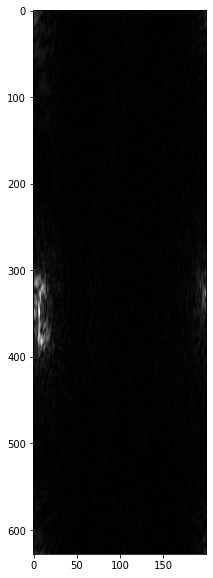

In [7]:
match_result = matcher.match_image(image_fft, template_fft)

# print(match_result)

plt.figure(figsize= (10, 10))
plt.imshow(match_result)

In [8]:
tracker = tr.BasicTracker(
    template_path="../tracker_tests/1_template.png",
    radius = radius,
    offset = img_offset,
    ect_offset = ect_offset,
    matcher = matcher
)

tracker.setup()

x: x=4, y=336


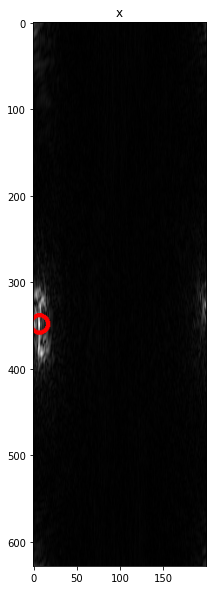

In [11]:
match_img = tracker.match(image)

# plt.imshow(match_img)
tracker.show_result("x", ...)